# Fluid Flow Example

conside the nonlinear e mean-field model of fluid flow past a circular cylinder at Reynolds number 100, described by these equations:
$$
\frac{\partial x_{1}}{\partial t} = \mu x_{1} - \omega x_{2} + A x_{1}x_{3}
$$
$$
\frac{\partial x_{2}}{\partial t} = \omega x_{1} + \mu x_{2} + Ax_{2}x_{3}
$$
$$
\frac{\partial x_{3}}{\partial t} = -\lambda(x_{3} - {x_{1}}^{2} - {x_{2}}^{2}) 
$$

Where $\mu = 0.1, \omega = 1, A=-0.1, \lambda = 10$

In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from dmd_machine.dmd_ae_machine import DMDMachine
from dmd_machine.loss_function import LossFunction
from data.Data import DataMaker
from datetime import date 
from tensorflow.keras.models import model_from_json
from return_stats import *
from create_plots import *
from datetime import date  
import pickle
import time
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.facecolor'] = 'white'
%matplotlib inline

In [68]:
training_data = pickle.load(open('./data/dataset_fluid.pkl', 'rb'))
data = training_data.data_val

In [69]:
data.shape

(10000, 3, 101)

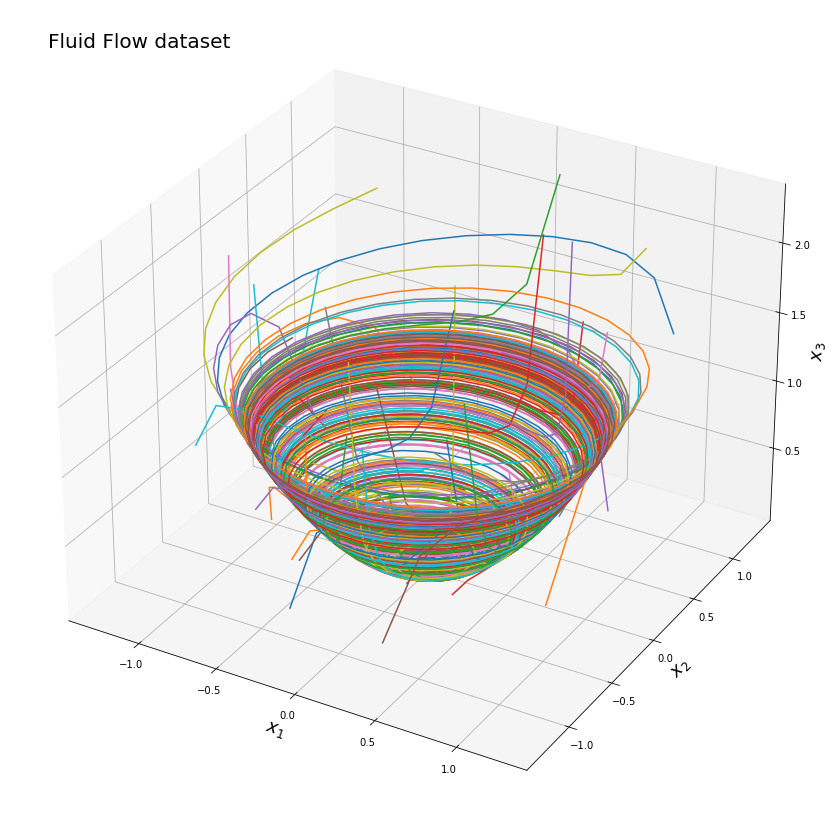

In [73]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')

for ii in np.arange(0, 1e4, 105):
    ii = int(ii)
    x1 = data[ii, 0, :]
    x2 = data[ii, 1, :]
    x3 = data[ii, 2, :]
    ax.plot3D(x1, x2, x3)

ax.set_xlabel("$x_{1}$", fontsize=18)
ax.set_ylabel("$x_{2}$", fontsize=18)
ax.set_zlabel("$x_{3}$", fontsize=18)
ax.text2D(0.05, 0.95, "Fluid Flow dataset", transform=ax.transAxes, fontsize=20)
plt.savefig('data/fluid_flow.png')


#ax.view_init(10, 10)
plt.show()


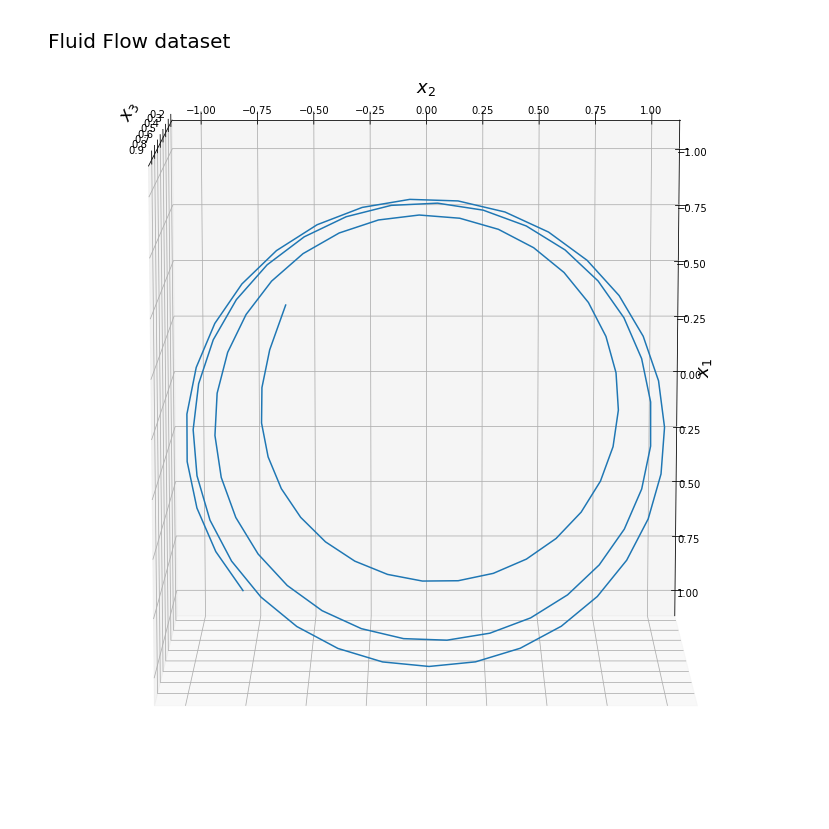

In [74]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')


ii = int(1e4-1)
x1 = data[ii, 0, :]
x2 = data[ii, 1, :]
x3 = data[ii, 2, :]
ax.plot3D(x1, x2, x3)

ax.set_xlabel("$x_{1}$", fontsize=18)
ax.set_ylabel("$x_{2}$", fontsize=18)
ax.set_zlabel("$x_{3}$", fontsize=18)
ax.text2D(0.05, 0.95, "Fluid Flow dataset", transform=ax.transAxes, fontsize=20)
plt.savefig('data/fluid_flow_overview.png')


ax.view_init(100, 0)
plt.show()
